In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [168]:
def init_layer(N):
    layer = np.zeros([N, N])
    for i in range(N):
        layer[i][0] = 4
        layer[0][i] = 1
        layer[i][-1] = 2
        layer[-1][i] = 3
    return layer

def init_layer_free(N):
    layer = np.zeros([N, N])
    return layer


def iteration_Zeidel_chess(init_layer, current_layer, N):
    next_layer = current_layer
    for i in range(1, N - 1):
        for j in range(1 + i % 2, N - 1, 2):
            next_layer[i][j] = 1 / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    for i in range(1, N - 1):
        for j in range(1 + (i + 1) % 2, N - 1, 2):
            next_layer[i][j] = 1 / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer

def iteration_Zeidel_linear(init_layer, current_layer, N):
    next_layer = current_layer
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            next_layer[i][j] = 1 / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer


def iteration_Jacobi(init_layer, current_layer, N):
    next_layer = init_layer(N)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            next_layer[i][j] = 1 / 4 * (current_layer[i][j - 1] + current_layer[i][j + 1] 
                                       + current_layer[i - 1][j] + current_layer[i + 1][j])
    return next_layer

tau = 0.5

def iteration_upper_relaxation_chess(init_layer, current_layer, N):
    next_layer = current_layer
    for i in range(1, N - 1):
        for j in range(1 + i % 2, N - 1, 2):
            next_layer[i][j] = (1 - tau) * next_layer[i][j] + tau / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    for i in range(1, N - 1):
        for j in range(1 + (i + 1) % 2, N - 1, 2):
            next_layer[i][j] = (1 - tau) * next_layer[i][j] + tau / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer

def iteration_upper_relaxation_linear(init_layer, current_layer, N):
    next_layer = current_layer
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            next_layer[i][j] = (1 - tau) * next_layer[i][j] + tau / 4 * (next_layer[i][j - 1] + next_layer[i][j + 1] 
                                       + next_layer[i - 1][j] + next_layer[i + 1][j])
    return next_layer

In [3]:
def difference(layer1, layer2):
    return np.max(np.abs(layer1 - layer2))

In [163]:
n_iter = 0
def iter_solve(init_layer, iteration, N, L, error = 0.00001):
    global n_iter
    n_iter = 0
    current_layer = init_layer(N)
    current_error = 1
    previous_layer = init_layer(N)
    previous_diff = 1
    current_diff = 1
    while (current_error > error and current_diff < 1000) or n_iter < 10:
        n_iter += 1
        previous_layer = np.copy(current_layer)
        current_layer = iteration(init_layer, current_layer, N)
        previous_diff = current_diff
        current_diff = difference(current_layer, previous_layer)
        if previous_diff - current_diff > 0:
            current_error = current_diff**2 / (previous_diff - current_diff)
    if current_diff >= 1000:
        n_iter = 0
    Y, X  = np.meshgrid(np.linspace(0, L, N), np.linspace(0, L, N))
    return (X, Y, current_layer)

### Решение методом Якоби

Число итераций: 6278


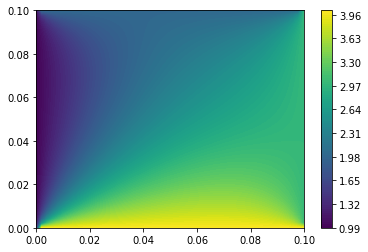

In [204]:
X1, Y1, Z1 = iter_solve(init_layer, iteration_Jacobi, 50, 0.1)
cs = plt.contourf(X1, Y1, Z1, 100)
plt.colorbar(cs)
print("Число итераций:", n_iter)

### Решение методом Зейделя с шахматным упорядочиванием

Число итераций: 3140


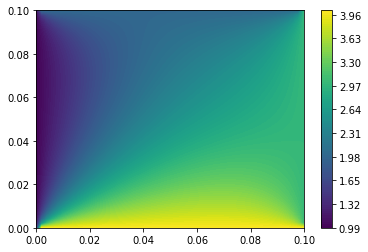

In [203]:
X2, Y2, Z2 = iter_solve(init_layer, iteration_Zeidel_chess, 50, 0.1)
cs = plt.contourf(X2, Y2, Z2, 100)
plt.colorbar(cs)
print("Число итераций:", n_iter)

### Решение методом Зейделя с линейным упорядочиванием

Число итераций: 3140


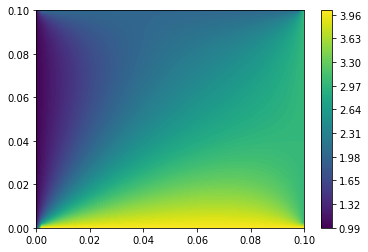

In [205]:
X3, Y3, Z3 = iter_solve(init_layer, iteration_Zeidel_linear, 50, 0.1)
cs = plt.contourf(X3, Y3, Z3, 100)
plt.colorbar(cs)
print("Число итераций:", n_iter)

### Решение методом верхней релаксации с шахматным упорядочиванием, $\tau = 1.884$

Число итераций: 113


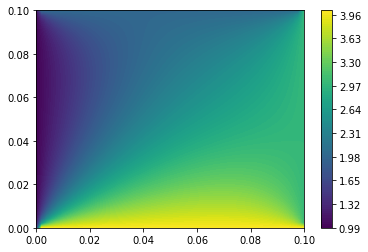

In [206]:
tau = 1.884
X4, Y4, Z4 = iter_solve(init_layer, iteration_upper_relaxation_chess, 50, 0.1)
cs = plt.contourf(X4, Y4, Z4, 100)
plt.colorbar(cs)
print("Число итераций:", n_iter)

### Решение методом верхней релаксации с линейным упорядочиванием, $\tau = 1.884$

196


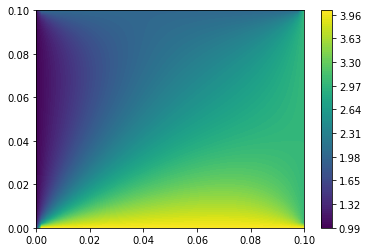

In [185]:
tau = 1.884
X5, Y5, Z5 = iter_solve(init_layer, iteration_upper_relaxation_linear, 50, 0.1)
cs = plt.contourf(X5, Y5, Z5, 100)
plt.colorbar(cs)
print("Число итераций:", n_iter)

In [188]:
def test_tau(f, N, ntau):
    global tau
    tau = ntau
    iter_solve(init_layer, f, N, 0.1)
    return n_iter

In [208]:
def test_taus(tau_min, tau_max, n, N, f):
    taus = np.linspace(tau_min, tau_max, n)
    xs = np.zeros(n)
    for i in range(n):
        xs[i] = test_tau(f, N, taus[i])
        print(taus[i], xs[i])
    plt.plot(taus, xs)

### Поиск оптимального значения параметра для методов верхней релаксации

1.8 326.0
1.8025423728813559 321.0
1.805084745762712 315.0
1.8076271186440678 310.0
1.8101694915254238 305.0
1.8127118644067797 299.0
1.8152542372881357 294.0
1.8177966101694916 289.0
1.8203389830508474 283.0
1.8228813559322035 278.0
1.8254237288135593 272.0
1.8279661016949154 267.0
1.8305084745762712 262.0
1.8330508474576273 256.0
1.835593220338983 251.0
1.838135593220339 245.0
1.840677966101695 240.0
1.8432203389830508 234.0
1.8457627118644069 228.0
1.8483050847457627 223.0
1.8508474576271186 217.0
1.8533898305084746 211.0
1.8559322033898304 205.0
1.8584745762711865 199.0
1.8610169491525423 193.0
1.8635593220338984 187.0
1.8661016949152542 181.0
1.86864406779661 174.0
1.8711864406779661 166.0
1.873728813559322 159.0
1.876271186440678 152.0
1.8788135593220339 142.0
1.88135593220339 138.0
1.8838983050847458 129.0
1.8864406779661016 134.0
1.8889830508474577 138.0
1.8915254237288135 139.0
1.8940677966101696 147.0
1.8966101694915254 167.0
1.8991525423728812 191.0
1.9016949152542373 196.0


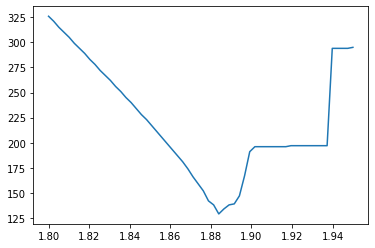

In [209]:
test_taus(1.8, 1.95, 60, 50, iteration_upper_relaxation_linear)

### Нахождение спектрального радиуса матрицы перехода метода Якоби

In [24]:
def Jacobi_get_spectral_radius(N):
    current_layer = np.zeros([N, N])
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            current_layer[i][j] = 1
    previous_layer = init_layer_free(N)
    for i in range(10000):
        previous_layer = current_layer
        current_layer = iteration_Jacobi(init_layer_free, current_layer, N)
    return np.max(abs(current_layer)) / np.max(abs(previous_layer))

In [194]:
Jacobi_get_spectral_radius(50)

0.9979453927503362

In [195]:
2 / (1 + math.sqrt(1 - 0.9979453927503362**2))

1.8795752032570257

### Построение графиков

3140


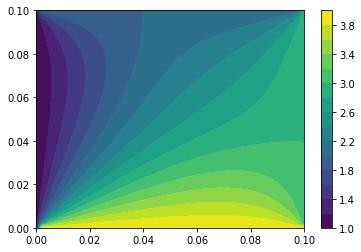

In [13]:
Xhq, Yhq, Zhq = iter_solve(init_layer, iteration_Zeidel_chess, 50, 0.1)
cs = plt.contourf(Xhq, Yhq, Zhq, 15)
plt.colorbar(cs)
print(n_iter)

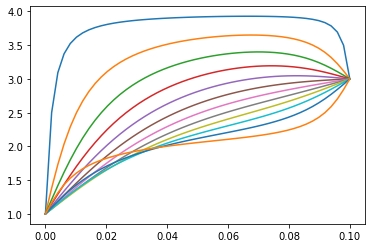

In [14]:
for i in range(1, 49, 4):
    plt.plot(np.transpose(Xhq)[i], np.transpose(Zhq)[i])

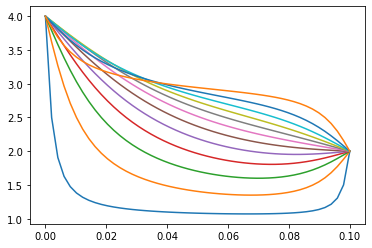

In [221]:
for i in range(1, 49, 4):
    plt.plot(Yhq[i], Zhq[i])

### Определение скорости сходимости схемы "крест" по сетке

In [90]:
tau = 1.7
X25, Y25, Z25 = iter_solve(init_layer, iteration_upper_relaxation_chess, 26, 0.1, error = 0.0000001)

In [89]:
tau = 1.87
X50, Y50, Z50 = iter_solve(init_layer, iteration_upper_relaxation_chess, 51, 0.1, error = 0.0000001)

In [60]:
tau = 1.94
X100, Y100, Z100 = iter_solve(init_layer, iteration_upper_relaxation_chess, 101, 0.1, error = 0.0000001)

In [61]:
tau = 1.9655
X200, Y200, Z200 = iter_solve(init_layer, iteration_upper_relaxation_chess, 201, 0.1, error = 0.0000001)

In [91]:
def crop(A, rx, ry):
    xm, ym = A.shape
    res = np.zeros([(xm - 1) // rx + 1, (ym - 1) // ry + 1])
    for i in range(0, (xm - 1) // rx + 1):
        for j in range(0, (ym - 1) // ry + 1):
            res[i][j] = A[i * rx][j * ry]
    return res

In [93]:
np.sum(np.abs(Z25 - crop(Z50, 2, 2)))

0.4392621039638771

In [215]:
(np.sum(np.abs(Z50 - crop(Z100, 2, 2))))

0.60316262563722

In [218]:
np.sum(crop(np.abs(Z100 - crop(Z200, 2, 2)),2,2))

0.1607251153676632

In [220]:
math.log(0.60316 / 0.16072, 2)

1.9079912868181117